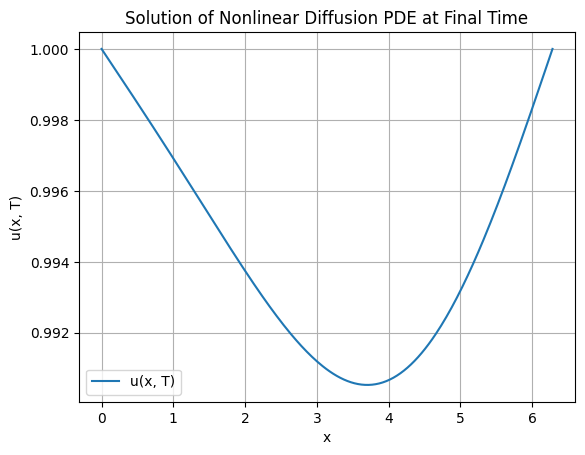

In [1]:
"""
Numerical solution of a nonlinear diffusion partial differential equation (PDE)
using finite difference method with explicit time stepping.

The PDE being solved is:
    ∂u/∂t = (1/γ) ∇·(η(u) ∇u)
where η(u) = (1/3)|9u + 1|, with Dirichlet boundary conditions.

Example:
    Solution evolves from initial condition u(x,0) = sin(x) + 1
    Final solution is plotted after 4.0 time units

Attributes:
    L (float): Spatial domain length (2π-periodic domain)
    Nx (int): Number of spatial grid points
    dx (float): Spatial step size
    x (ndarray): Spatial grid coordinates
    T (float): Total simulation time
    dt (float): Time step size (0.00001)
    Nt (int): Number of time steps
    kappa (int): Unused parameter in current implementation
    gamma (int): Scaling factor in PDE (γ=2)
    u (ndarray): Solution array at current time step
    u_new (ndarray): Solution array at next time step
"""

import numpy as np
import matplotlib.pyplot as plt  # Fixed matplotlib import

# --------------------------
# Domain and Discretization
# --------------------------
L = 2 * np.pi        # Spatial domain length
Nx = 256             # Number of spatial grid points
dx = L / (Nx - 1)    # Spatial step size
x = np.linspace(0, L, Nx)  # Spatial grid

# --------------------------
# Time Parameters
# --------------------------
T = 4.0              # Total simulation time
dt = 0.00001         # Time step size (explicit method requires small dt)
Nt = int(T / dt)     # Number of time steps

# --------------------------
# PDE Parameters
# --------------------------
kappa = 3            # Currently unused parameter
gamma = 2            # Scaling factor in PDE equation

# --------------------------
# Initial Conditions
# --------------------------
u = np.sin(x) + 1    # Initial solution profile
u_new = np.zeros_like(u)  # Solution array for next time step

# --------------------------
# Boundary Conditions
# --------------------------
# Dirichlet boundary conditions (fixed endpoints)
u[0] = 1             # Left boundary value
u[-1] = 1            # Right boundary value

# --------------------------
# Time Stepping Loop
# --------------------------
for n in range(Nt):
    # Compute nonlinear diffusion coefficient
    eta = (1 / 3.0) * np.abs(9 * u + 1)
    
    # Calculate η at cell midpoints (averaging adjacent values)
    eta_iphalf = 0.5 * (eta[1:] + eta[:-1])
    
    # --------------------------
    # Flux Computation
    # --------------------------
    flux = np.zeros_like(u)
    # Central difference approximation for flux terms
    flux[1:-1] = (eta_iphalf[1:] * (u[2:] - u[1:-1]) 
                - eta_iphalf[:-1] * (u[1:-1] - u[:-2])) / dx**2
    
    # --------------------------
    # Update Rule
    # --------------------------
    u_new[1:-1] = u[1:-1] + (dt / gamma) * flux[1:-1]
    
    # --------------------------
    # Boundary Condition Enforcement
    # --------------------------
    u_new[0] = 1      # Maintain left boundary
    u_new[-1] = 1     # Maintain right boundary
    
    # Array reference swap for next iteration
    u, u_new = u_new, u

# --------------------------
# Visualization
# --------------------------
plt.plot(x, u, label='u(x, T)')
plt.title('Solution of Nonlinear Diffusion PDE at Final Time')
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.grid(True)
plt.legend()
plt.show()

# --------------------------
# Implementation Notes
# --------------------------
# 1. Uses explicit Euler time stepping - stability depends on small dt
# 2. Spatial discretization uses central differences for flux terms
# 3. Parameter kappa is declared but not used in current implementation
# 4. Dirichlet BCs are reapplied at each time step to handle numerical drift
